# Load Dataset

In [1]:
import cv2 as cv
import tensorflow as tf
import os

2024-05-01 01:11:39.571529: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 01:11:40.314755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
smile_face_dir = ['dataset/Kaggle/smile', 'dataset/SMILEsmileD/SMILEs/positives/positives7']
non_smile_face_dir = ['dataset/Kaggle/non_smile', 'dataset/SMILEsmileD/SMILEs/negatives/negatives7']

In [3]:
path = 'dataset/SMILEsmileD/SMILEs/positives/positives7/15.jpg'
img = cv.imread(path)
# Kiểm tra kích thước của ảnh (số hàng, số cột, số kênh màu)
height, width, channels = img.shape

# In thông tin về ảnh
print(path)
print("Kích thước của ảnh:", height, "x", width)
print("Số kênh màu của ảnh:", channels)

# Xác định hệ màu dựa trên số kênh màu
if channels == 1:
    print("Ảnh là ảnh grayscale (hệ màu xám)")
elif channels == 3:
    print("Ảnh là ảnh RGB")
elif channels == 4:
    print("Ảnh là ảnh RGBA")
else:
    print("Ảnh không phải là ảnh grayscale, RGB hoặc RGBA")

dataset/SMILEsmileD/SMILEs/positives/positives7/15.jpg
Kích thước của ảnh: 64 x 64
Số kênh màu của ảnh: 3
Ảnh là ảnh RGB


In [4]:
# Hàm để đọc ảnh và chuyển đổi thành tensor
def read_and_convert_to_tensor(image_path):
    img = cv.imread(image_path)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_tensor = tf.convert_to_tensor(img_gray)
    return img_tensor

In [5]:
features = []
labels = []

# Load ảnh có mặt cười
for dir in smile_face_dir:
    for filename in os.listdir(dir):
        img_path = os.path.join(dir, filename)
        img_tensor = read_and_convert_to_tensor(img_path)
        features.append(img_tensor)
        labels.append(1)
        
# Load ảnh không có mặt cười
for dir in non_smile_face_dir:
    for filename in os.listdir(dir):
        img_path = os.path.join(dir, filename)
        img_tensor = read_and_convert_to_tensor(img_path)
        features.append(img_tensor)
        labels.append(0)

# Chuyển list features và labels thành tensor
features_tensor = tf.stack(features)
labels_tensor = tf.constant(labels)

2024-05-01 01:11:41.442855: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 01:11:41.468090: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 01:11:41.468149: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 01:11:41.471442: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 01:11:41.471531: I external/local_xla/xla/stream_executor

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

In [7]:
# Trộn dataset để tránh sai số sinh ra từ việc thu thập dữ liệu
dataset = dataset.shuffle(buffer_size=len(features))

# In thông tin về dataset
print("Số lượng mẫu trong dataset sau khi đã trộn:", len(list(dataset)))

Số lượng mẫu trong dataset sau khi đã trộn: 12128


2024-05-01 01:11:50.244481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
# Kiểm tra một số mẫu từ dataset
for sample in dataset.take(5):
    print("Features:", sample[0].shape)
    print("Label:", sample[1])

Features: (64, 64)
Label: tf.Tensor(0, shape=(), dtype=int32)
Features: (64, 64)
Label: tf.Tensor(1, shape=(), dtype=int32)
Features: (64, 64)
Label: tf.Tensor(0, shape=(), dtype=int32)
Features: (64, 64)
Label: tf.Tensor(0, shape=(), dtype=int32)
Features: (64, 64)
Label: tf.Tensor(0, shape=(), dtype=int32)


2024-05-01 01:11:51.055424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Data Visualization

In [9]:
import matplotlib.pyplot as plt

2024-05-01 01:11:56.069498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


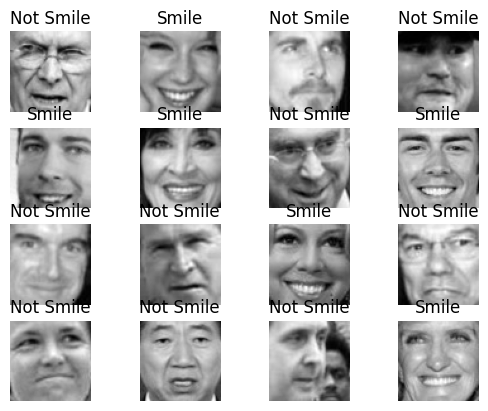

In [10]:
for index, (image, label) in enumerate(dataset.take(16)):
  ax = plt.subplot(4, 4, index + 1)
  plt.imshow(image, cmap='gray')
  if label == 1:
    plt.title("Smile")
  else:
    plt.title("Not Smile")
  plt.axis('off')

# Chia dataset thành các tập train, val, test

In [12]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

In [13]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)
  # Lấy các phần tử dầu tiên
  train = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  # skip các phần tử đã dùng làm train set
  val_test = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val = val_test.take(int(VAL_RATIO*DATASET_SIZE))

  test = val_test.skip(int(VAL_RATIO*DATASET_SIZE))
  return train, val, test

In [14]:
dataset

<_ShuffleDataset element_spec=(TensorSpec(shape=(64, 64), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [15]:
train, val, test = splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
# In số lượng mẫu trong mỗi tập
print("Số lượng mẫu trong tập train:", len(list(train)))
print("Số lượng mẫu trong tập validation:", len(list(val)))
print("Số lượng mẫu trong tập test:", len(list(test)))

2024-05-01 01:12:02.496548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Số lượng mẫu trong tập train: 7276


2024-05-01 01:12:02.989017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Số lượng mẫu trong tập validation: 2425
Số lượng mẫu trong tập test: 2427


2024-05-01 01:12:03.514787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
# Shuffer train và val lần nữa để khi train là ngẫu nhiên
train = train.shuffle(buffer_size=len(train))
val = val.shuffle(buffer_size=len(val))

In [17]:
# Batch training và val set
BATCH_SIZE = 64
train = train.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val = val.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [18]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Build CNN networks

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization

In [20]:
# Xây dựng kiến trúc mạng CNN để train
model = tf.keras.Sequential([
    InputLayer(shape = (64, 64, 1)),

    # Các Convolution layer và Pooling layer phục trách extract (trích xuất) các feature hữu ích trong ảnh. Gọi là feature extractor
    Conv2D(
        filters = 6,
        kernel_size = 3,
        strides = 1,
        padding = 'valid',
        activation = 'relu'
    ),
    # Tiến hành BatchNormalization: Các image trong cùng 1 batch tiến hành standard normalization
    # Là 1 kỹ thuật quan trọng trong deeplearning được sử dụng để ổn định và tăng tốc độ train mạng neutron
    # Được áp dụng trước hoặc sau các lớp activation của mạng neutron
      # 1. Ổn định quá trình huấn luyện: : BatchNormalization giúp làm giảm sự phụ thuộc vào việc khởi tạo tham số của mạng và giúp giảm hiện tượng biến mất hoặc đột biến gradient trong quá trình lan truyền ngược (backpropagation). Điều này giúp tăng tốc quá trình huấn luyện và cải thiện khả năng học của mạng.
      # 2. Giảm overfitting: BatchNormalization cũng có thể giúp giảm overfitting bằng cách cải thiện tính tổng quát hóa của mô hình. Nó hoạt động như một loại regularization bằng cách kiểm soát phạm vi giá trị của các feature maps trong quá trình huấn luyện.
      # 3. Tăng tốc độ hội tụ: BatchNormalization có thể giúp tăng tốc độ hội tụ của mô hình bằng cách giảm thiểu sự biến đổi của tham số trong quá trình huấn luyện, giúp mạng đạt được giá trị tối ưu nhanh hơn.
    BatchNormalization(),

    MaxPool2D(
        pool_size = 2,
        strides = 2
    ),

    Conv2D(
        filters = 16,
        kernel_size = 3,
        strides = 1,
        padding = 'valid',
        activation = 'relu'
    ),
    BatchNormalization(),

    MaxPool2D(
        pool_size = 2,
        strides = 2
    ),

    Flatten(),

    # Fully connected layer: chịu trách nhiệm phân loại ảnh
    Dense(100, activation = "relu"),
    BatchNormalization(),

    Dense(10, activation = "relu"),
    BatchNormalization(),

    Dense(1, activation = "sigmoid"),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,189 (1.21 MB)

 Trainable params: 315,925 (1.21 MB)

 Non-trainable params: 264 (1.03 KB)

Định nghĩa optimizer để train và loss funtion

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC

In [22]:
metrics = [
    TruePositives(name='TP'),
    FalsePositives(name='FP'),
    TrueNegatives(name='TN'),
    FalseNegatives(name='FN'),
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall'),
    AUC(name='auc')
]

In [23]:
model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = BinaryCrossentropy(),
    metrics = metrics
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,189 (1.21 MB)

 Trainable params: 315,925 (1.21 MB)

 Non-trainable params: 264 (1.03 KB)

# Training

In [24]:
history = model.fit(
    train,
    validation_data = val,
    epochs = 200,
    verbose = 1
)

Epoch 1/200


I0000 00:00:1714500739.663551  783541 service.cc:145] XLA service 0x7f4630014210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714500739.663597  783541 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-05-01 01:12:19.748468: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-01 01:12:20.038954: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 24/114 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - FN: 68.3750 - FP: 133.2500 - TN: 405.3333 - TP: 193.0417 - accuracy: 0.6999 - auc: 0.7533 - loss: 0.5861 - precision: 0.5419 - recall: 0.7075

I0000 00:00:1714500742.487451  783541 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - FN: 322.2261 - FP: 301.3478 - TN: 2164.0696 - TP: 923.4521 - accuracy: 0.8028 - auc: 0.8607 - loss: 0.4285 - precision: 0.7075 - recall: 0.7323 - val_FN: 489.0000 - val_FP: 13.0000 - val_TN: 1603.0000 - val_TP: 320.0000 - val_accuracy: 0.7930 - val_auc: 0.9358 - val_loss: 0.5683 - val_precision: 0.9610 - val_recall: 0.3956
Epoch 2/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - FN: 248.2087 - FP: 178.8087 - TN: 2247.6174 - TP: 1036.4608 - accuracy: 0.8831 - auc: 0.9480 - loss: 0.2745 - precision: 0.8497 - recall: 0.8046 - val_FN: 198.0000 - val_FP: 78.0000 - val_TN: 1511.0000 - val_TP: 638.0000 - val_accuracy: 0.8862 - val_auc: 0.9421 - val_loss: 0.2901 - val_precision: 0.8911 - val_recall: 0.7632
Epoch 3/200
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - FN: 214.3044 - FP: 138.3826 - TN: 2312.6174 - TP: 1045.7913 - accuracy: 0.9059 - auc: 0.9612 - loss: 0.2314 - precision: 0.8908 - recall: 0.8254 - val_FN: 126.0000 - val_FP: 87.0000 - val_TN: 14

In [25]:
history

In [26]:
import matplotlib.pyplot as plt

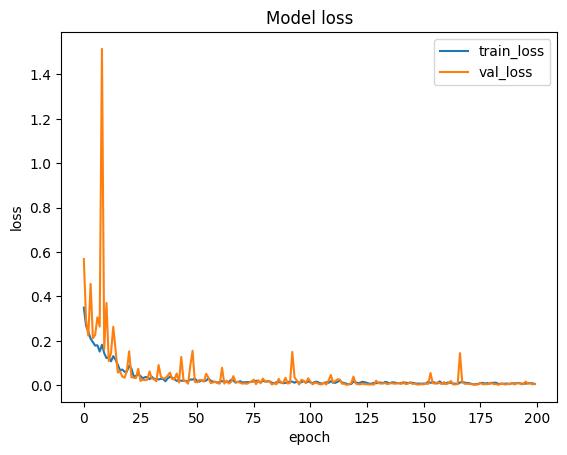

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

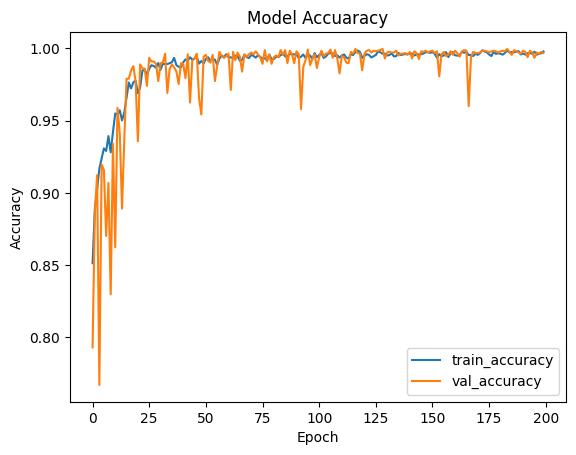

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuaracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# Đánh giá model

In [29]:
test = test.batch(1)

In [30]:
model.evaluate(test)

2427/2427 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - FN: 4.2323 - FP: 0.0000e+00 - TN: 805.2298 - TP: 405.0375 - accuracy: 0.9972 - auc: 0.9996 - loss: 0.0057 - precision: 0.9996 - recall: 0.9915


[0.008016861975193024,
 824.0,
 0.0,
 1593.0,
 10.0,
 0.9958797097206116,
 1.0,
 0.9880095720291138,
 0.9999747276306152]

In [31]:
print(test.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 64, 64), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [32]:
def smile_or_not(x):
  if (x < 0.5):
    return str('Not Smile')
  else:
    return str('Smile')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


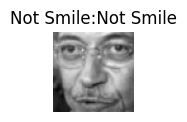

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


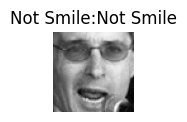

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


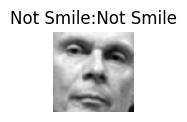

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


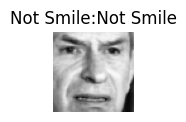

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


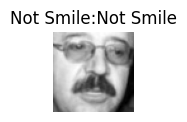

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


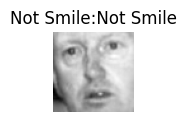

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


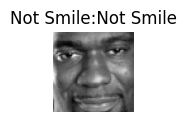

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


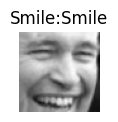

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


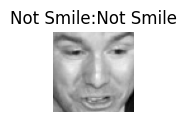

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


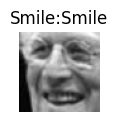

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


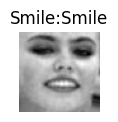

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


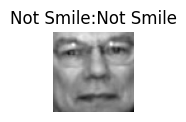

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


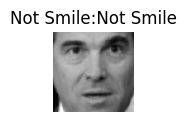

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


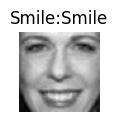

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


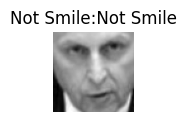

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


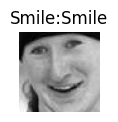

2024-05-01 01:15:50.710841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
for index, (image, label) in enumerate(test.take(16)):
    ax = plt.subplot(4, 4, index+1)
    # Chuyển đổi tensor ảnh thành mảng NumPy
    image_np = image.numpy()
    # Lặp qua từng ảnh trong mảng NumPy
    for i in range(image_np.shape[0]):
        plt.imshow(image_np[i], cmap='gray')
        # Dự đoán nhãn của ảnh
        prediction = model.predict(image[i][tf.newaxis, ...])[0][0]
        plt.title(str(smile_or_not(label.numpy()[i])) + ":" + str(smile_or_not(prediction)))
        plt.axis('off')
        plt.show()

# Lưu model

In [34]:
model.save('model.keras')

In [35]:
# Đọc ảnh từ tập tin
image = cv.imread('face5.jpg')

# Chuyển đổi ảnh sang định dạng và kích thước phù hợp với mô hình của bạn
# (ví dụ: chuyển ảnh về màu xám và resize thành kích thước mong muốn)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_resized = cv.resize(image_gray, (64, 64))

# Mở rộng chiều của ảnh để tạo thành một batch dữ liệu
input_data = tf.expand_dims(image_resized, axis=0)

# Chuyển đổi dtype của tensor từ uint8 sang float32 (nếu cần)
input_data = tf.cast(input_data, tf.float32)

# Dự đoán kết quả bằng cách sử dụng model
predictions = model.predict(input_data)

# In kết quả dự đoán
print(predictions[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
0.09840307
